In [125]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import minimize
%matplotlib inline

In [127]:
def likelihood_poi(n, mu, bkg, s0=1.0, neg=False):
    """Return the value of the Poisson likelihood function, given the:
       - mu: signal strength parameter,
       - n: number of events observed,
       - bkg: expected number of background events,
       - s0: nominal number of signal events
       The total expected number of events is lambda = bkg + mu*s0.
       
       The `neg` argument just multiplies the likelihood by (-1).
       This is used for the minimize() function."""
    sig = mu * s0
    exp = bkg + sig
    likelihood = poisson.pmf(n, mu=exp)
    
    if neg:
        return -likelihood
    return likelihood

In [128]:
def q(likelihood, mu, n, bkg, s0=1.0):
    """Calculates the value of the test statistic q (Tevatron test statistic)"""
    ll_s_b  = np.log( likelihood(n=n, mu=mu, bkg=bkg, s0=s0) )
    ll_b    = np.log( likelihood(n=n, mu=0,  bkg=bkg, s0=s0) )
    q = -2.0 * (ll_s_b - ll_b)
    return q

In [80]:
q_vec    = np.vectorize(q)

In [105]:
nExperiments = 10000
s0 = 1.0

## Hypotheses

In [106]:
mu = 20.0

### Null hypothesis $H_{0}: s + b$

$H_{1}$ hypothesis parameters

In [107]:
b_H0 = 1000.0     # - Number of background events
s_H0 = mu * s0    # - Number of signal events
n_pred_H0 = b_H0 + s_H0  # - s + b
mup_H0 = s_H0/s0         # - mu^' (mu prime)
sigma_muhat_H0 = np.sqrt(n_pred_H0)/s0

In [108]:
events_H0 = poisson.rvs(mu=n_pred_H0, loc=0.0, size=nExperiments)

### Alternative hypothesis $H_{1}: b$ only

In [109]:
b_H1 = 1000.0
s_H1 = 0.0
n_pred_H1 = b_H1 + s_H1
mup_H1 = s_H1/s0
sigma_muhat_H1 = np.sqrt(n_pred_H1)/s0

In [110]:
events_H1 = poisson.rvs(mu=n_pred_H1, loc=0.0, size=nExperiments)

Reminder:

\begin{equation}
    s = \mu s_{0}
\end{equation}

\begin{equation}
    \hat{\mu} = \frac{n - b}{s_{0}}
\end{equation}

The test statistic $q$ can be simplified as:
\begin{equation}
    q
    = 
    -2 \ln \frac{\mathcal{L}(\mu)}{\mathcal{L}(\mu=0)}
    =
    -2 \ln \frac{\mathcal{L}(\mu)}{\mathcal{L}(\hat{\mu})}
    +2 \ln \frac{\mathcal{L}(\mu=0)}{\mathcal{L}(\hat{\mu})}
    =
    \frac{(\hat{\mu}-\mu)^{2}}{\sigma^{2}_{\hat{\mu}}}
    -
    \frac{\hat{\mu}^{2}}{\sigma^{2}_{\hat{\mu}}}
    =
    \frac{ \mu^{2} - 2 \mu \hat{\mu} }{\sigma^{2}_{\hat{\mu}}}
\end{equation}

Therefore $q$ is simply:

\begin{equation}
    q 
    =
    \frac{\mu^{2} - 2 \hat{\mu} \mu}{\sigma^{2}_{\hat{\mu}}}
\end{equation}

### Expected values

Expected value under the assumption of $H_0$:

- $\hat{\mu} = \mu$

\begin{equation}
    E[q]|_{H_{0}}
    =
    - \frac{\mu^{2}}{\sigma^{2}_{\hat{\mu}}|_{H_{0}}}
    = 
    \frac{\mu^{2}}{ \frac{ b+\mu s_{0}}{s^{2}_{0}} }
\end{equation}

Expected value under the assumption of $H_1$:

- $\hat{\mu} = 0$

\begin{equation}
    E[q]|_{H_{1}}
    =
    \frac{\mu^{2}}{\sigma^{2}_{\hat{\mu}}|_{H_{1}}}
    =
    \frac{\mu^{2}}{ \frac{b}{s^{2}_{0}} }
\end{equation}

### Variance

Variance value under the assumption of $H_0$:

- $\hat{\mu} = \mu$

\begin{equation}
    V[q]|_{H_{0}}
    =
    - \frac{4 \mu^{2}}{\sigma^{2}_{\hat{\mu}}|_{H_{0}}}
    = 
    \frac{4 \mu^{2}}{ \frac{ b+\mu s_{0}}{s^{2}_{0}} }
\end{equation}

Variance under the assumption of $H_1$:

- $\hat{\mu} = 0$

\begin{equation}
    V[q]|_{H_{1}}
    =
    \frac{4 \mu^{2}}{\sigma^{2}_{\hat{\mu}}|_{H_{1}}}
    =
    \frac{4 \mu^{2}}{ \frac{b}{s^{2}_{0}} }
\end{equation}

## Distributions for the number of events observed assuming $H_{0}$ and $H_{1}$

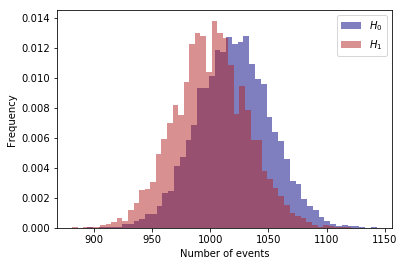

In [111]:
f, a = plt.subplots();
h0 = a.hist(events_H0, bins=50, color="navy",      label=r'$H_{0}$', normed=True, alpha=0.5);
h1 = a.hist(events_H1, bins=50, color="firebrick", label=r'$H_{1}$', normed=True, alpha=0.5);
handles, labels = a.get_legend_handles_labels()
a.legend(handles, labels)
a.set_xlabel('Number of events');
a.set_ylabel('Frequency');

## Distribution of test statistic, $q$

In [112]:
# - Note:
# - Depending on the the number of samples requested this might take a while.
q_H0 = q_vec(likelihood_poi, mu=mu,  n=events_H0, bkg=b_H0, s0=1.0)
q_H1 = q_vec(likelihood_poi, mu=mu,  n=events_H1, bkg=b_H1, s0=1.0)

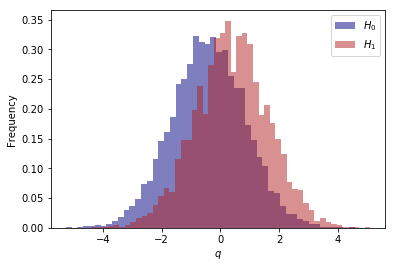

In [113]:
f, a = plt.subplots();
a.hist(q_H0, bins=50, color='navy',      label=r'$H_{0}$', normed=True, alpha=0.5);
a.hist(q_H1, bins=50, color='firebrick', label=r'$H_{1}$', normed=True, alpha=0.5);
handles, labels = a.get_legend_handles_labels()
a.legend(handles, labels)
a.set_xlabel('$q$');
a.set_ylabel('Frequency');

In [114]:
q_median_H0 = np.median(q_H0)
q_median_H1 = np.median(q_H1)

In [115]:
q_exp_H0 = - mu**2 / sigma_muhat_H0**2
q_exp_H1 = + mu**2 / sigma_muhat_H1**2

In [116]:
print("Med[q]|H0 = {} (from simulation)".format(q_median_H0))
print("Med[q]|H1 = {} (from simulation)".format(q_median_H1))
print("Exp[q]|H0 = {} (formula)".format(q_exp_H0))
print("Exp[q]|H1 = {} (formula)".format(q_exp_H1))

Med[q]|H0 = -0.39735968420791323 (from simulation)
Med[q]|H1 = 0.39474540764058474 (from simulation)
Exp[q]|H0 = -0.3921568627450981 (formula)
Exp[q]|H1 = 0.4 (formula)


In [133]:
var_H0_sample  = np.var(q_H0)
var_H1_sample  = np.var(q_H1)
var_H0_formula = 4.0 * mu**2 / sigma_muhat_H0**2
var_H1_formula = 4.0 * mu**2 / sigma_muhat_H1**2

In [134]:
print("Var[q]|H0 = {} (from simulation)".format(var_H0_sample))
print("Var[q]|H1 = {} (from simulation)".format(var_H1_sample))
print("Var[q]|H0 = {} (formula)".format(var_H0_formula))
print("Var[q]|H1 = {} (formula)".format(var_H1_formula))

Var[q]|H0 = 1.5725042843081811 (from simulation)
Var[q]|H1 = 1.5499619648609704 (from simulation)
Var[q]|H0 = 1.5686274509803924 (formula)
Var[q]|H1 = 1.6 (formula)
